In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Data visualization/googleplaystore.csv')

In [4]:
df=df.dropna()
df=df.drop_duplicates()

<ipython-input-5-a0788ab2aebd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="rocket")


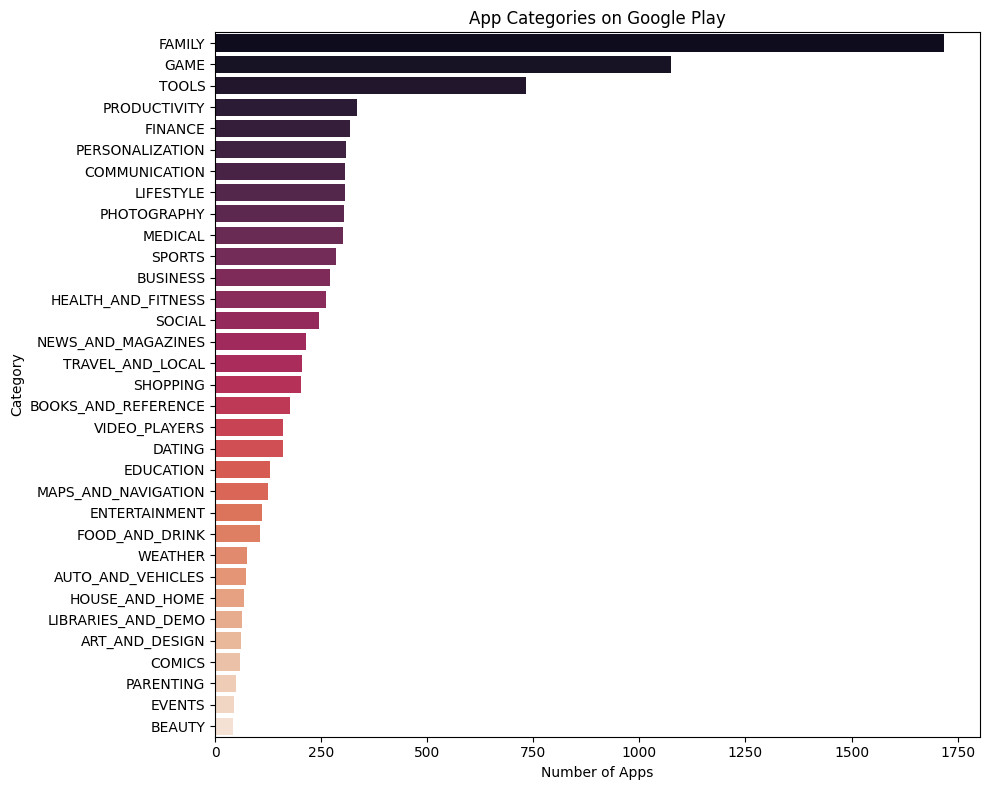

In [5]:
category_counts = df['Category'].value_counts()


plt.figure(figsize=(10, 8))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="rocket")
plt.title('App Categories on Google Play')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()

# Save the figure
plt.savefig('images/top_10_categories.png')

# Then display the plot
plt.show()


<ipython-input-10-be51eb940f7b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating',y='Category', data=df_clean, palette="rocket")


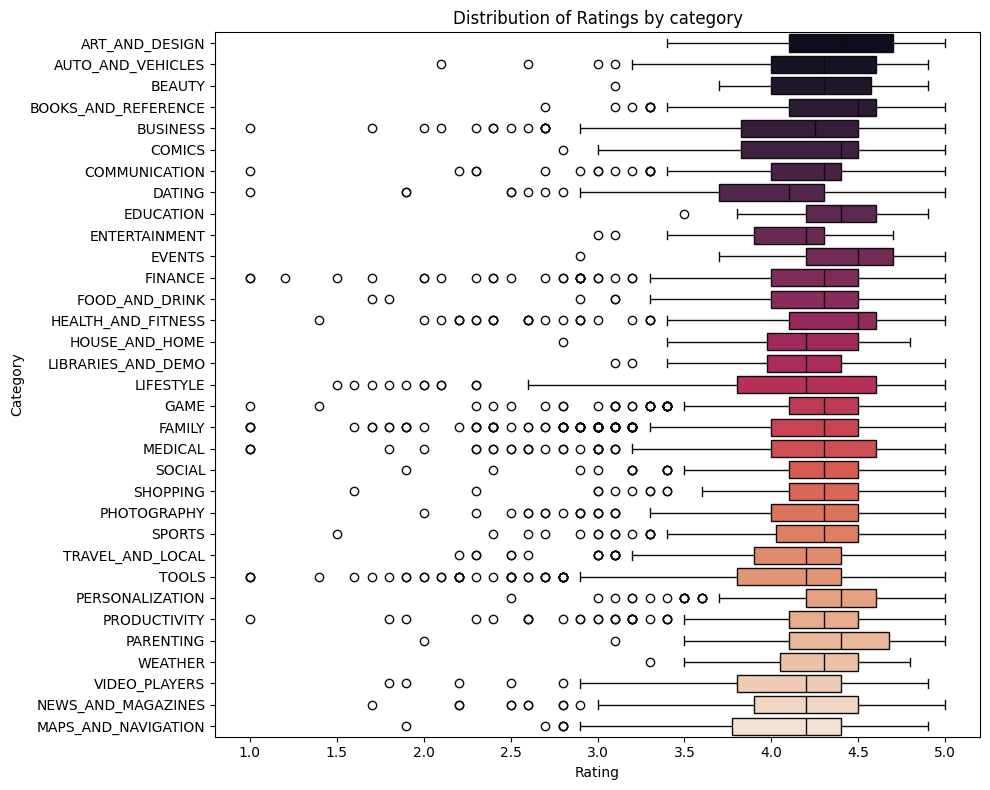

(<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>,
 None)

In [10]:
plt.figure(figsize=(10, 8))
df_clean=df[['Category','Rating']].dropna()

sns.boxplot(x='Rating',y='Category', data=df_clean, palette="rocket")
plt.title('Distribution of Ratings by category')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('images/Distribution of Ratings by category.png')
plt,plt.show()


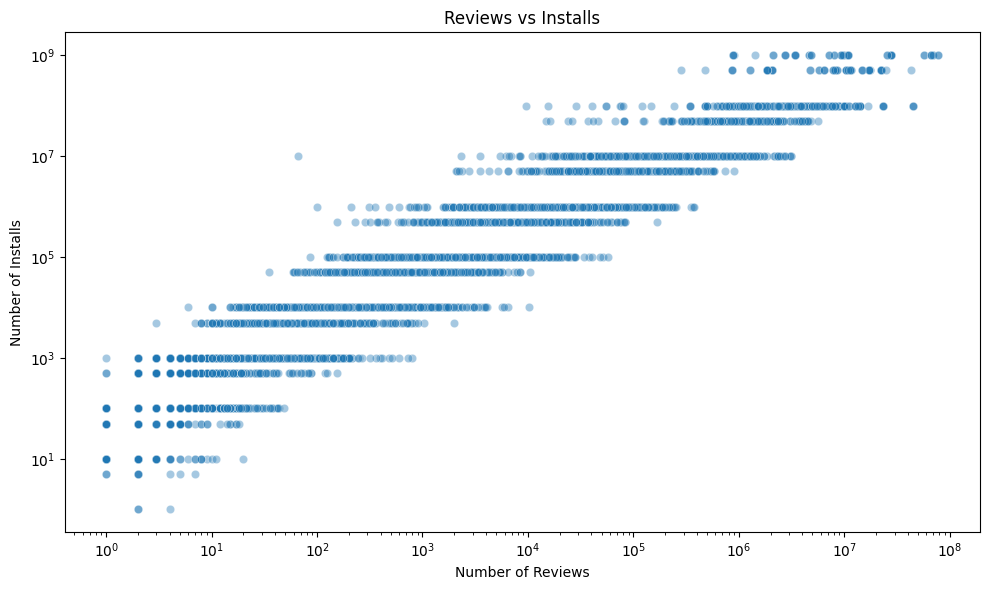

In [11]:
df_clean=df[['Reviews','Installs']].dropna()
df_clean['Installs'] = df_clean['Installs'].str.replace('[+,]', '', regex=True).astype(int)
df_clean['Reviews'] = df_clean['Reviews'].astype(int)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Reviews', y='Installs', alpha=0.4)
plt.title('Reviews vs Installs')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Installs')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.savefig('images/Reviews vs Installs.jpeg')
plt.show()

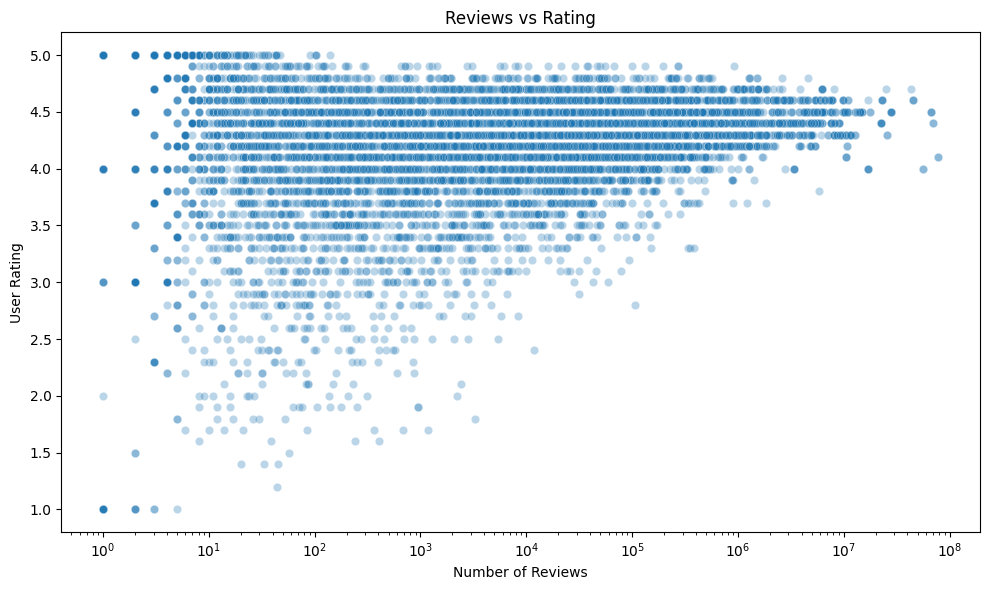

In [12]:
df_clean2 = df[['Reviews', 'Rating']].dropna()
df_clean2['Reviews'] = df_clean2['Reviews'].astype(int)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean2, x='Reviews', y='Rating', alpha=0.3)
plt.title('Reviews vs Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('User Rating')
plt.xscale('log')
plt.tight_layout()
plt.savefig('images/Reviews vs Rating.jpeg')
plt.show()

In [18]:
category_content_counts = df.groupby(['Category', 'Content Rating']).size().reset_index(name='App Count')


print(category_content_counts)

              Category Content Rating  App Count
0       ART_AND_DESIGN       Everyone         57
1       ART_AND_DESIGN   Everyone 10+          1
2       ART_AND_DESIGN           Teen          3
3    AUTO_AND_VEHICLES       Everyone         71
4    AUTO_AND_VEHICLES   Everyone 10+          1
..                 ...            ...        ...
108      VIDEO_PLAYERS           Teen         24
109            WEATHER       Everyone         71
110            WEATHER   Everyone 10+          1
111            WEATHER     Mature 17+          1
112            WEATHER           Teen          2

[113 rows x 3 columns]


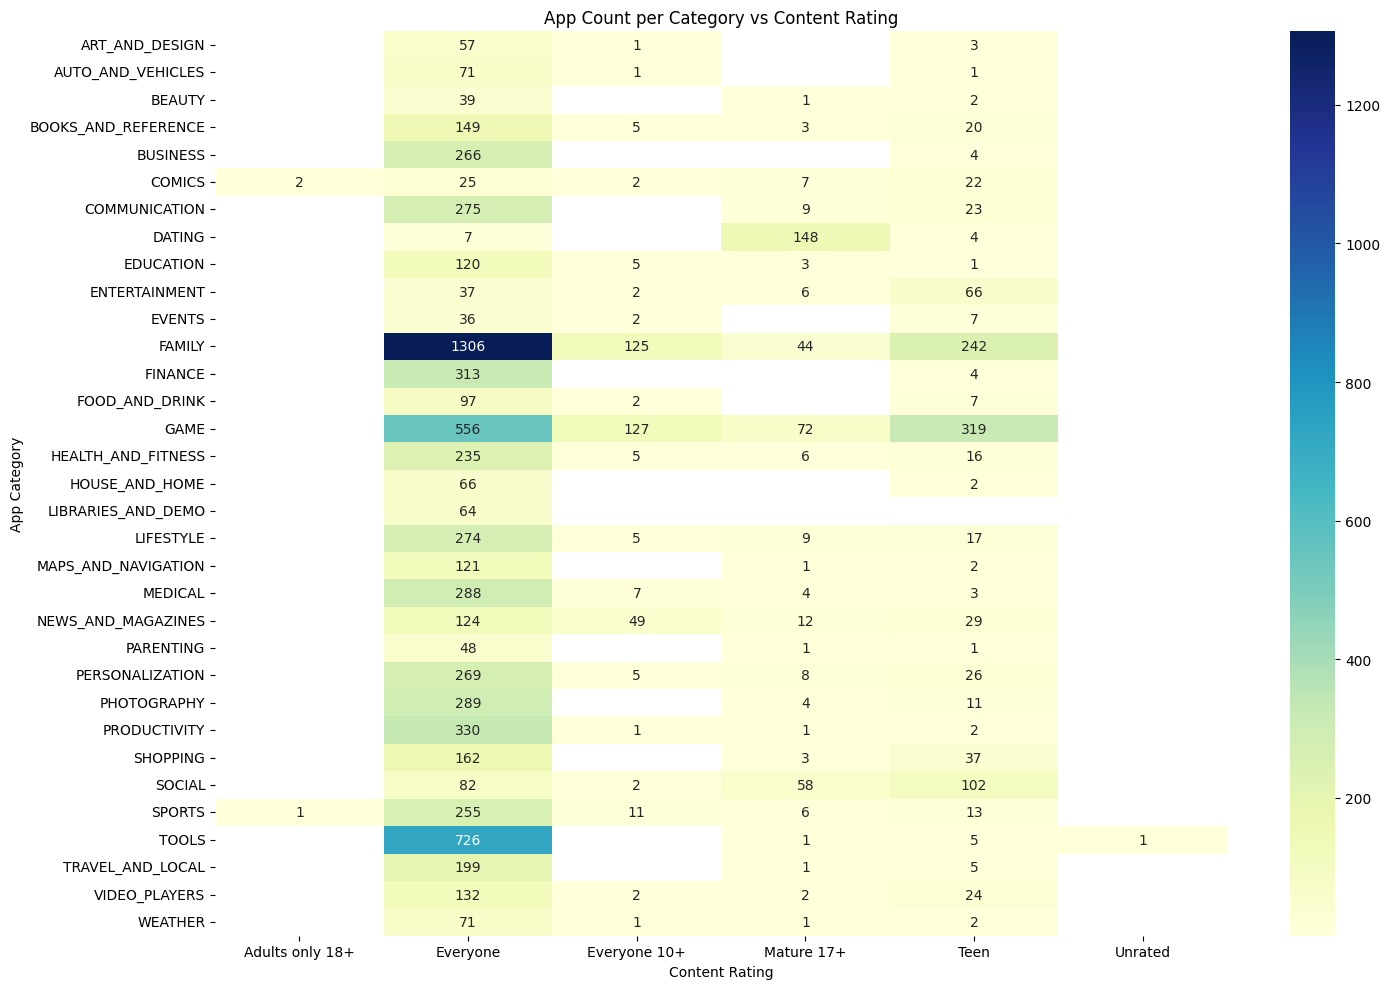

In [19]:
pivot_table = category_content_counts.pivot(index='Category', columns='Content Rating', values='App Count')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')

plt.title('App Count per Category vs Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('App Category')
plt.tight_layout()

plt.savefig('images/App_Count_per_Category_vs_Content_Rating.png')
plt.show()


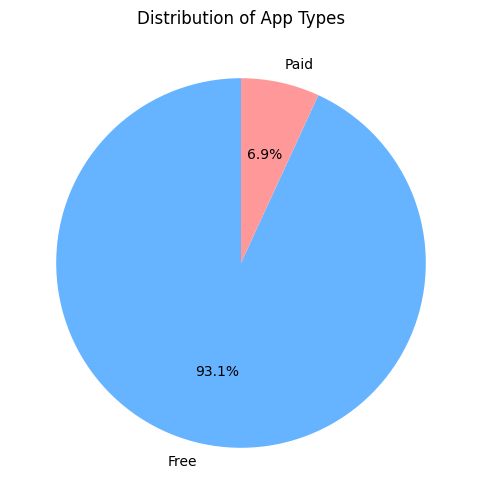

In [20]:
count_type=df['Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(count_type, labels=count_type.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of App Types')
plt.savefig('images/Distribution of App Types.png')
plt.show()

<ipython-input-21-829c06b7ffcc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=installs_per_category.values, y=installs_per_category.index, palette='mako')


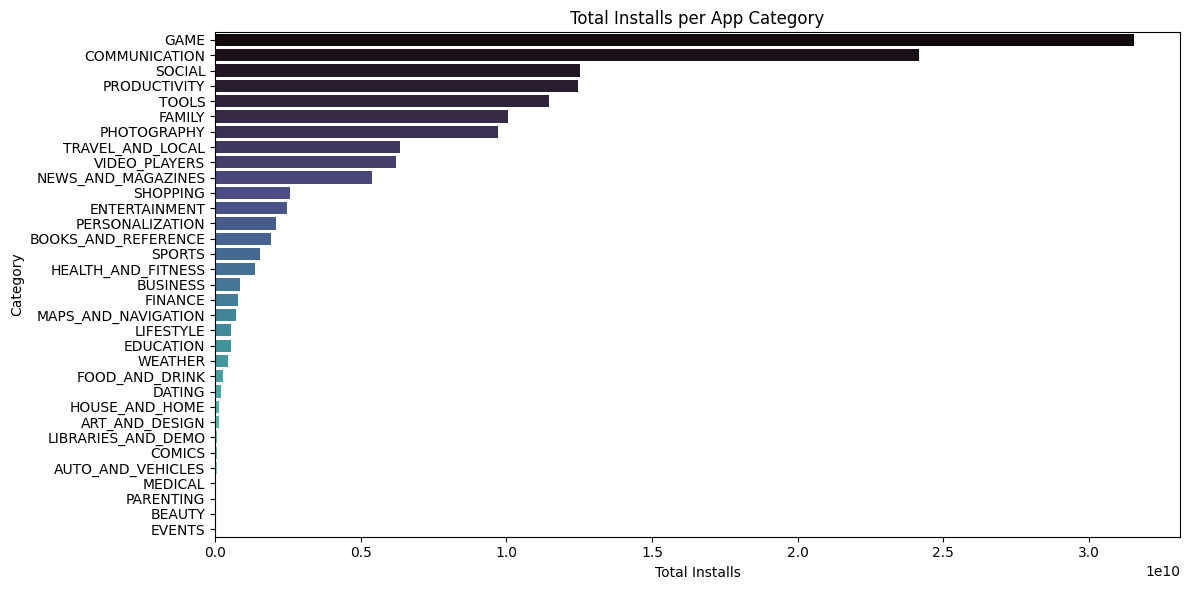

In [21]:
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(int)
installs_per_category = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=installs_per_category.values, y=installs_per_category.index, palette='mako')
plt.title('Total Installs per App Category')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('images/Total Installs per App Category.png')
plt.show()

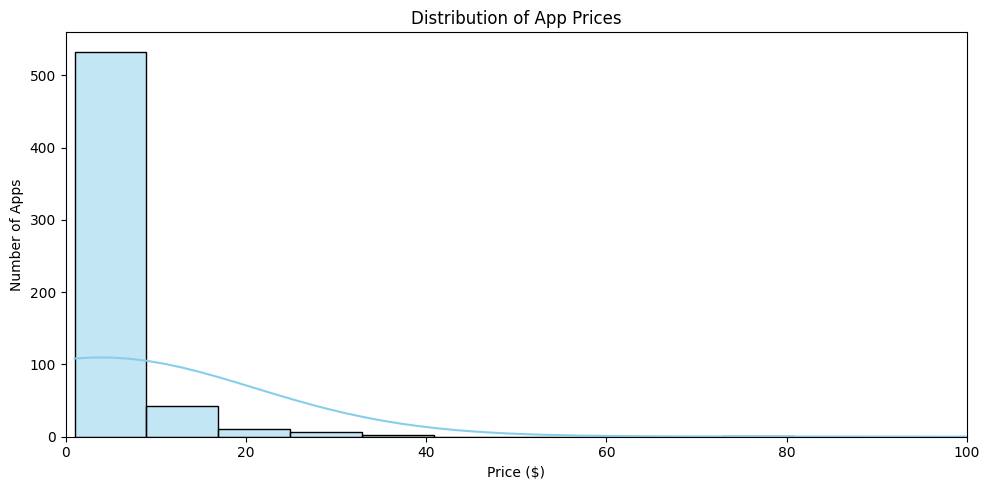

In [22]:
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False).astype(float)

paid_apps = df[df['Price'] > 0]

plt.figure(figsize=(10, 5))
sns.histplot(paid_apps['Price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of App Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Apps')
plt.xlim(0, 100)
plt.tight_layout()
plt.savefig('images/Distribution of App Prices.png')
plt.show()


<ipython-input-23-a5dfee8d9926>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10], palette='coolwarm')


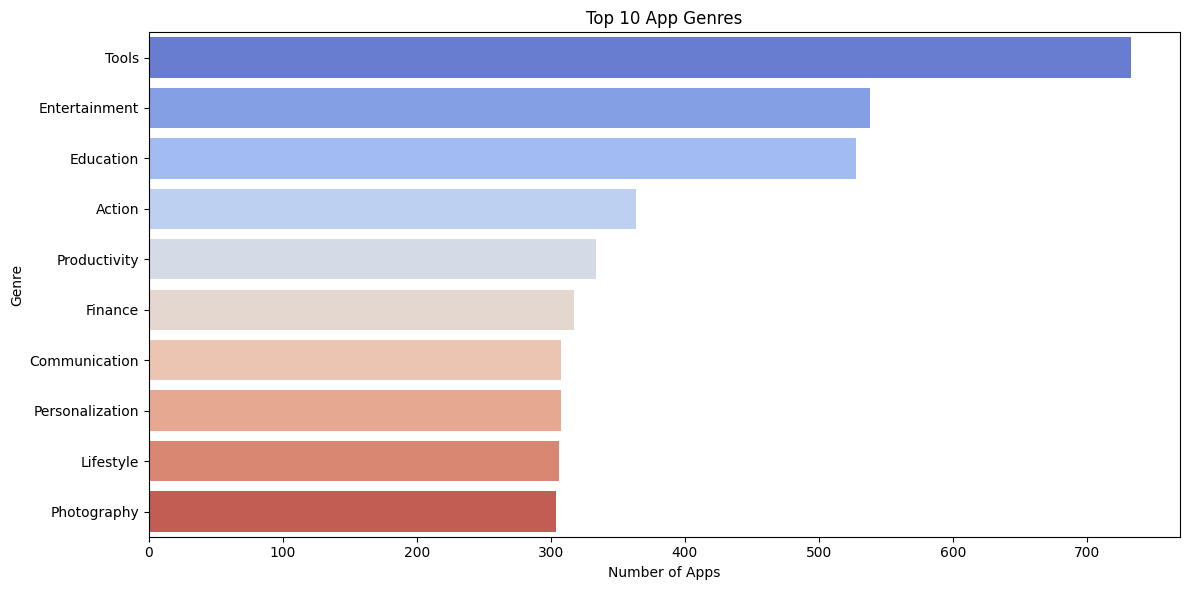

In [23]:
df['Genres_Clean'] = df['Genres'].astype(str).str.split(';').str[0]

genre_counts = df['Genres_Clean'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10], palette='coolwarm')
plt.title('Top 10 App Genres')
plt.xlabel('Number of Apps')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('images/Top 10 App Genres.png')
plt.show()


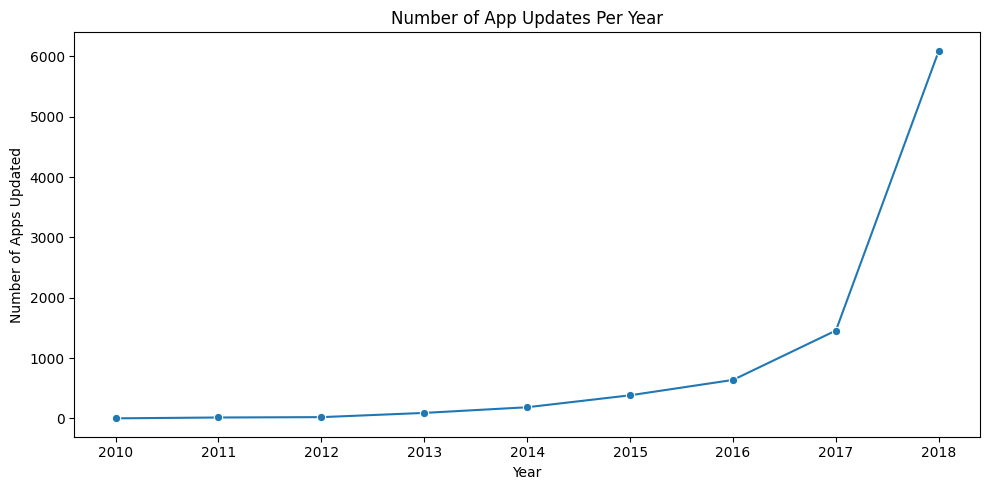

In [24]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

df['Year'] = df['Last Updated'].dt.year
yearly_updates = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_updates.index, y=yearly_updates.values, marker='o')
plt.title('Number of App Updates Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Apps Updated')
plt.tight_layout()
plt.savefig('images/Number of App Updates Per Year.png')
plt.show()


<ipython-input-25-c8855b4a0a79>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Android Ver', order=df['Android Ver'].value_counts().index, palette='viridis')


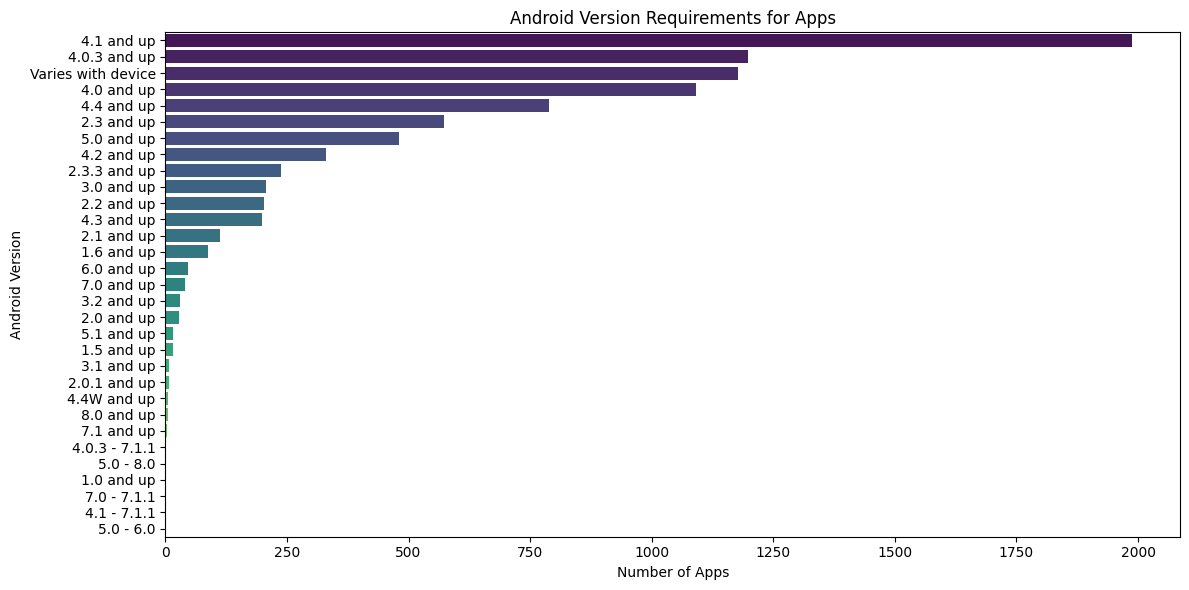

In [25]:
# Fill missing values and convert to string for consistency
df['Android Ver'] = df['Android Ver'].fillna('Unknown').astype(str)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Android Ver', order=df['Android Ver'].value_counts().index, palette='viridis')
plt.title('Android Version Requirements for Apps')
plt.xlabel('Number of Apps')
plt.ylabel('Android Version')
plt.tight_layout()
plt.savefig('images/Android Version Requirements for Apps.png')
plt.show()
# Simplify versions like "4.0.3 and up" to just "4.0.3"
df['Android Ver'] = df['Android Ver'].str.extract(r'(\d+\.\d+|\d+)')


In [26]:
# Convert necessary columns to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = df['Installs'].astype(str).str.replace('[+,]', '', regex=True).astype(float)
df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False).astype(float)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with any missing values in these columns
df_corr = df[['Rating', 'Reviews', 'Installs', 'Price']].dropna()


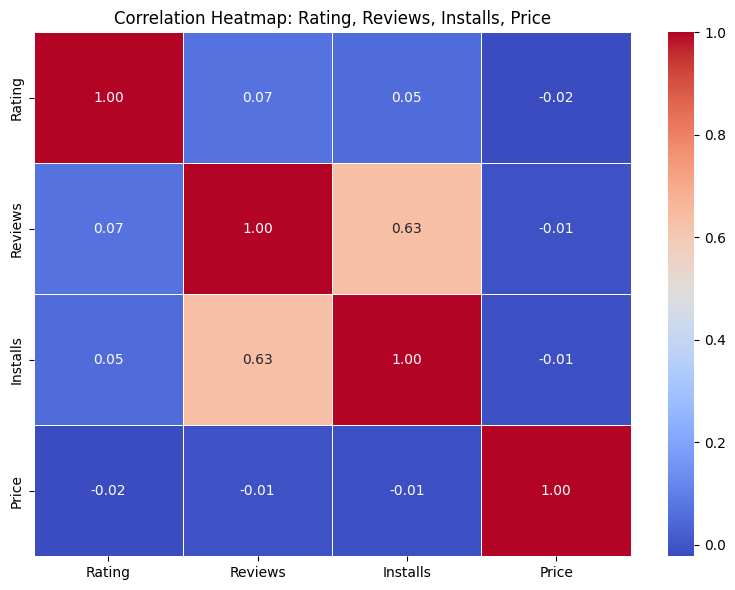

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap: Rating, Reviews, Installs, Price')
plt.tight_layout()
plt.savefig('images/correlation_heatmap.png')  # Save it
plt.show()


In [30]:
os.makedirs('data', exist_ok=True)